# 書籍 Pythonではじめる機械学習 をハンズオン的にやる

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split # データを学習用とテスト用に分割する関数

# anaconda3/binに移動してから./pip install mglearnで入れたら認識された
# 可視化をきちんと学ぶならこれをimportせずに動くようにしたほうが良い気がする
import mglearn

%matplotlib inline

### 学習用データの読み込みと中身の確認

デファクトスタンダード的になっている機械学習用の初学者用のデータセットをロードする。
以降、変数のスコープを狭くするためにちょくちょく関数化しておく。

In [2]:
def load_iris_test():
    from sklearn.datasets import load_iris
    iris_dataset = load_iris()
    # キー一覧の表示
    print('keys of iris_dataset: \n{}'.format(iris_dataset.keys()))
    print("- " * 40)
    # 説明文の表示
    print(iris_dataset['DESCR'])
    print("- " * 40)
    # 特徴量名一覧の表示、sepalは「がく」のこと。petalは「花びら」のこと。
    print(iris_dataset['feature_names'])
    print("- " * 40)
    # データの表示
    print(iris_dataset['data'])
    print("- " * 40)
    # 正解値の表示
    print(iris_dataset['target'])
    print("- " * 40)
    # 各正解値に対応する名称の表示
    print(iris_dataset['target_names'])
load_iris_test()

keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.949

### データの整理

学習用とテスト用にデータを分割する。scikit-learnには超絶便利な関数あり。

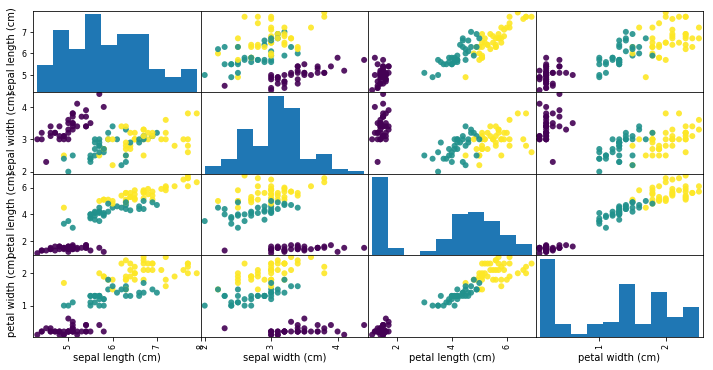

In [3]:
def visualize_iris_test():
    from sklearn.datasets import load_iris
    iris_dataset = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
    iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
    dummy = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, marker='o', alpha=0.9, figsize=(12,6))
visualize_iris_test()

## 機械学習

k-最近傍法での分類をやってみる。

Prediction: [0]
Predicted target name: ['setosa']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
X.shape: (26, 2)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


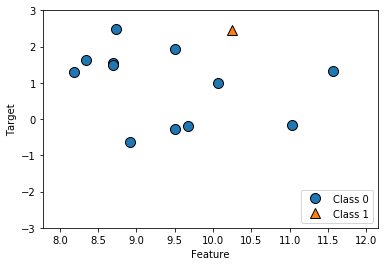

In [4]:
def k_neighbors_classifier_test():
    from sklearn.datasets import load_iris
    from sklearn.neighbors import KNeighborsClassifier
    iris_dataset = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(np.array([[5,2.9,1,0.2]]))
    print("Prediction: {}".format(prediction))
    print("Predicted target name: {}".format(iris_dataset["target_names"][prediction]))
    print("- " * 40)
    y_pred = knn.predict(X_test)
    print("Test set predictions:\n {}".format(y_pred))
    print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
    print("- " * 40)
    X, y = mglearn.datasets.make_forge()
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(["Class 0", "Class 1"], loc=4)
    plt.xlabel("1st feature")
    plt.ylabel("2nd feature")
    print("X.shape: {}".format(X.shape))
    print("- " * 40)
    X, y = mglearn.datasets.make_wave(n_samples=40)
    plt.plot(X, y, "o")
    plt.ylim(-3, 3)
    plt.xlabel("Feature")
    plt.ylabel("Target")
k_neighbors_classifier_test()

## 教師あり機械学習

X.shape: (26, 2)


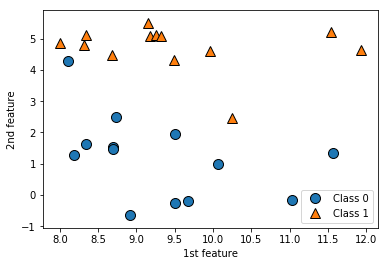

In [5]:
def aaaa():
    X, y = mglearn.datasets.make_forge()
    mglearn.discrete_scatter(X[:,0], X[:,1], y)
    plt.legend(["Class 0", "Class 1"], loc=4)
    plt.xlabel("1st feature")
    plt.ylabel("2nd feature")
    print("X.shape: {}".format(X.shape))
aaaa()

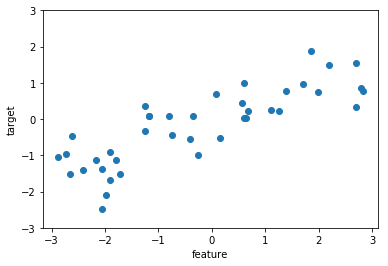

In [6]:
def bbbb():
    X, y = mglearn.datasets.make_wave(n_samples=40)
    plt.plot(X, y, "o")
    plt.ylim(-3, 3)
    plt.xlabel("feature")
    plt.ylabel("target")
bbbb()

In [7]:
def show_breast_cancer_data():
    from sklearn.datasets import load_breast_cancer # ウィスコンシン乳癌データセット
    cancer = load_breast_cancer()
    print("cancer.keys(): \n\t{}".format(cancer.keys()))
    print("cancer.data.shape: \n\t{}".format(cancer.data.shape))
    print("# of samples:\n\t{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
    print("features:\n\t{}".format(cancer.feature_names))
show_breast_cancer_data()

cancer.keys(): 
	dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
cancer.data.shape: 
	(569, 30)
# of samples:
	{'malignant': 212, 'benign': 357}
features:
	['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston # 1970年代のボストン郊外の住宅価格
boston = load_boston()
print("boston.data.shape:\n\t{}".format(boston.data.shape))

boston.data.shape:
	(506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-最近傍法によるクラス分類

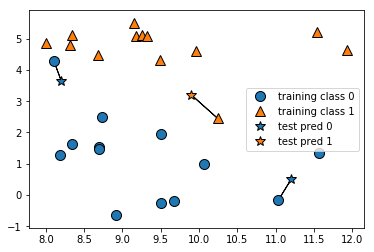

In [10]:
# forgeデータセットのクラス分類
mglearn.plots.plot_knn_classification(n_neighbors=1)

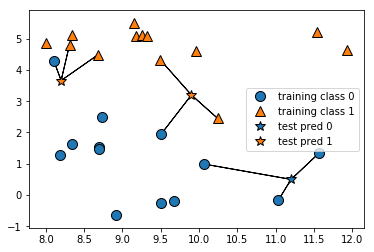

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

test set predictions: [1 0 1 0 1 0 0]
test set accuracy: 0.86


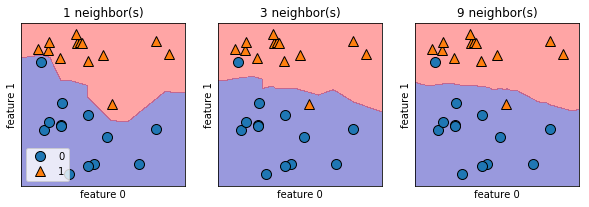

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("test set predictions: {}".format(clf.predict(X_test)))
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # n_neighborsの値が大きくなるとグラフが滑らかになることがわかる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

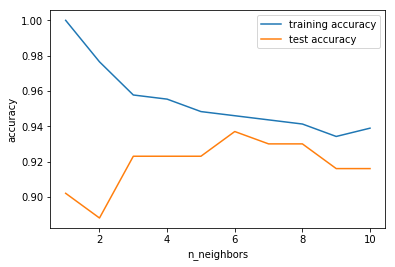

In [13]:
# 上のほうでもロードしているけれど、コードを一箇所にまとめたいのでもういっかい。
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

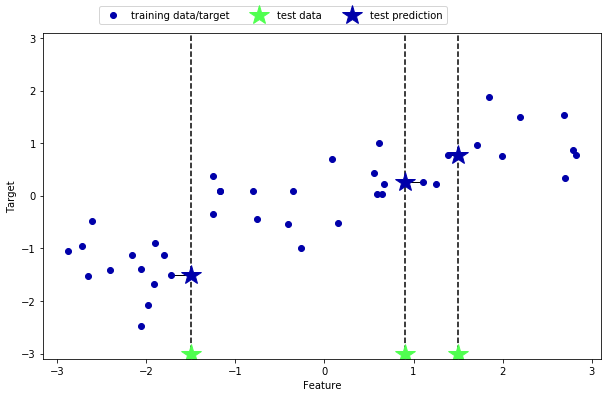

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

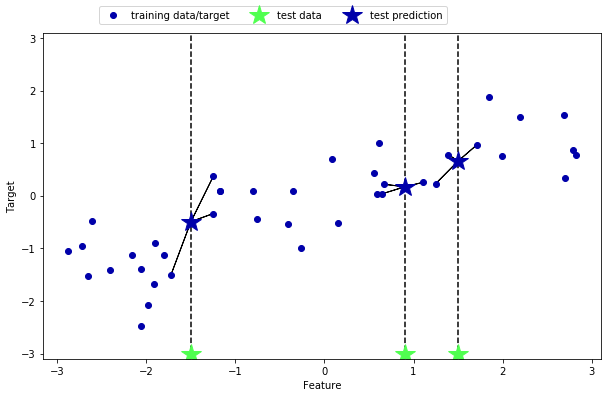

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

test set predictions: 
[-0.27184732  1.37500284 -1.13881398  0.42109041 -0.44680446  0.35686046
  0.91241374 -0.05396539 -0.05396539  0.35686046 -1.44042723 -1.89415682
 -0.27184732 -1.63113382  0.91241374  1.37500284 -1.13881398  0.91241374
 -1.44042723  1.37500284 -2.07693788 -0.06473558 -1.13881398 -0.08537718
 -1.89415682 -0.05396539  0.42109041  0.42109041  0.35686046 -0.08555622]
test set R^2: 0.83


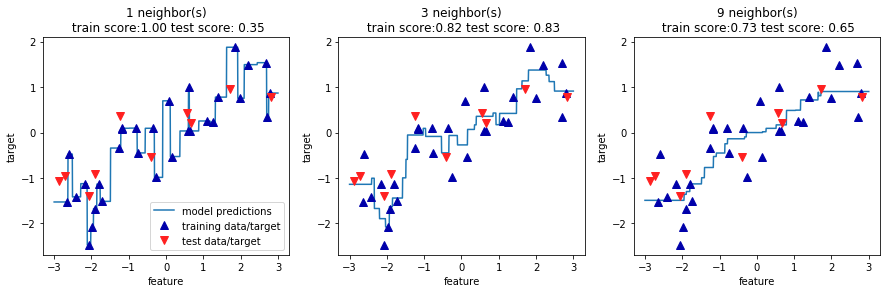

In [16]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("test set predictions: \n{}".format(reg.predict(X_train)))
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test,"v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score: {:.2f}".format(
                    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predictions", "training data/target", "test data/target"], loc="best")

### 2.3.3 線形モデル

w[0]: 0.393906  b: -0.031804


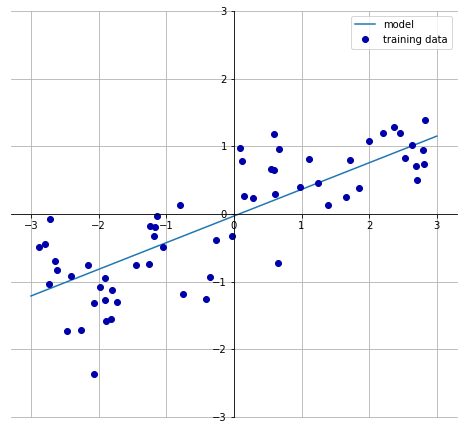

In [17]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰（通常最小二乗法）

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

print('traing set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
traing set score: 0.67
test set score: 0.66


In [19]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('train set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


このようにテストセットのスコアが大幅に低いのはおそらく過剰適合が発生している場合である。

#### 2.3.3.3 リッジ回帰

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('train set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


同じデータセットに対して異なる異なるモデルを当てはめたら学習セットはスコアが下がりテストセットはスコアが上がった。